# Data Retrieval

In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
import matplotlib.cm as cm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
departamentos = ["AMAZONAS", "ANCASH", "APURIMAC", "AREQUIPA", "AYACUCHO", "CAJAMARCA", 
    "CALLAO", "CUSCO", "HUANCAVELICA", "HUANUCO", "ICA", "JUNIN", "LA%20LIBERTAD", "LAMBAYEQUE", 
    "LIMA%20DIRIS%20CENTRO", "LIMA%20DIRIS%20ESTE", "LIMA%20DIRIS%20NORTE", "LIMA%20DIRIS%20SUR", "LIMA", "LORETO",
     "MADRE%20DE%20DIOS", "MOQUEGUA", "PASCO", "PIURA", "PUNO", "SAN%20MARTIN", "TACNA", "TUMBES", "UCAYALI"]

url_base = "https://raw.githubusercontent.com/LuisSante/Datasets/main/Anemia/HIS%20Ni%C3%B1os%202019/HB/Ni%C3%B1os%20"

departamentos = departamentos[:2]

dataset = []
for dep in departamentos:
    url = url_base + dep + ".csv"
    d = pd.read_csv(url, encoding='latin-1')
    dataset.append(d)


In [31]:
# merge all the dataframes of dataset into one
df = pd.concat(dataset)
df = df.reset_index(drop=True)
df.head()

,ï»¿Diresa,Red,Microred,EESS,Renipress,FechaAtencion,Sexo,FechaNacimiento,EdadMeses,UbigeoPN,...,Cred,Suplementacion,Consejeria,Sesion,DEPARTAMENTO,PROVINCIA,DISTRITO,ALTITUD,HBC,Dx_Anemia
0,AMAZONAS,CHACHAPOYAS,JUMBILLA,I-1 - 00004926 - RECTA,4926,11/13/2019,M,11/13/2017,24,10308.0,...,1,0,0,0,AMAZONAS,BONGARA,RECTA,1950,11.494917,Normal
1,AMAZONAS,CHACHAPOYAS,LAMUD,I-1 - 00004852 - SAN CRISTOBAL DE OLTO,4852,4/4/2019,F,5/30/2014,59,10516.0,...,0,0,0,0,AMAZONAS,LUYA,SAN CRISTOBAL,2000,10.952880,Anemia Leve
2,AMAZONAS,CHACHAPOYAS,LAMUD,I-1 - 00004852 - SAN CRISTOBAL DE OLTO,4852,4/4/2019,M,6/23/2014,58,10516.0,...,0,0,0,0,AMAZONAS,LUYA,SAN CRISTOBAL,2000,12.452880,Normal
3,AMAZONAS,CHACHAPOYAS,LEYMEBAMBA,I-1 - 00007067 - LA MORADA,7067,4/1/2019,M,10/1/2014,54,10106.0,...,1,1,0,0,AMAZONAS,CHACHAPOYAS,CHUQUIBAMBA,3450,10.512719,Anemia Leve
4,AMAZONAS,CHACHAPOYAS,LEYMEBAMBA,I-1 - 00007067 - LA MORADA,7067,12/10/2019,M,12/10/2015,48,10106.0,...,1,1,0,0,AMAZONAS,CHACHAPOYAS,CHUQUIBAMBA,3450,9.412719,Anemia Moderada


In [32]:
# Available features
df.columns

Index(['ï»¿Diresa', 'Red', 'Microred', 'EESS', 'Renipress', 'FechaAtencion',
       'Sexo', 'FechaNacimiento', 'EdadMeses', 'UbigeoPN', 'DepartamentoPN',
       'ProvinciaPN', 'DistritoPN', 'CentroPobladoPN', 'Juntos', 'SIS', 'Pin',
       'Qaliwarma', 'Peso', 'Talla', 'Hemoglobina', 'FechaHemoglobina', 'Cred',
       'Suplementacion', 'Consejeria', 'Sesion', 'DEPARTAMENTO', 'PROVINCIA',
       'DISTRITO', 'ALTITUD', 'HBC', 'Dx_Anemia'],
      dtype='object')

# Preprocessing

In [33]:
df = df[['Sexo', 'Juntos', 'SIS', 'Qaliwarma', 'Peso', 'Talla', 'Hemoglobina', 'Cred', 'Suplementacion', 'ALTITUD', 'HBC', 'Dx_Anemia']]
df.head()

,Sexo,Juntos,SIS,Qaliwarma,Peso,Talla,Hemoglobina,Cred,Suplementacion,ALTITUD,HBC,Dx_Anemia
0,M,1,1,0,11.36,89.3,12.2,1,0,1950,11.494917,Normal
1,F,0,1,1,,,11.7,0,0,2000,10.952880,Anemia Leve
2,M,1,1,1,,,13.2,0,0,2000,12.452880,Normal
3,M,1,1,1,19.9,106,13.0,1,1,3450,10.512719,Anemia Leve
4,M,1,1,0,15.1,96,11.9,1,1,3450,9.412719,Anemia Moderada


In [34]:
# Sexo 
df['Sexo'] = df['Sexo'].fillna(df['Sexo'].mode()[0])
df['Sexo'] = df['Sexo'].map( {'F': 1, 'M': 0} ).astype(int)

# # Juntos
df['Juntos'] = df['Juntos'].fillna(df['Juntos'].mode()[0])

# # SIS
df['SIS'] = df['SIS'].fillna(df['SIS'].mode()[0])

# # Qaliwarma
df['Qaliwarma'] = df['Qaliwarma'].fillna(df['Qaliwarma'].mode()[0])

# Peso 
df['Peso'] = pd.to_numeric(df['Peso'], errors='coerce')
df['Peso'] = df['Peso'].fillna(df['Peso'].mean())

# Talla
df['Talla'] = pd.to_numeric(df['Talla'], errors='coerce')
df['Talla'] = df['Talla'].fillna(df['Talla'].mean())

df['Talla'] = df['Talla'].map(lambda x: talla_promedio if type(x) != float else x)

# # Hemoglobina
df['Hemoglobina'] = df['Hemoglobina'].fillna(df['Hemoglobina'].mean())

# # Cred
df['Cred'] = df['Cred'].fillna(df['Cred'].mode()[0])

# # Suplementacion
df['Suplementacion'] = df['Suplementacion'].fillna(df['Suplementacion'].mode()[0])

# # ALTITUD
df['ALTITUD'] = df['ALTITUD'].fillna(df['ALTITUD'].mode()[0])

# # HBC
df['HBC'] = df['HBC'].fillna(df['HBC'].mode()[0])

# # Dx_Anemia
df['Dx_Anemia'] = df['Dx_Anemia'].fillna(df['Dx_Anemia'].mode()[0])

df.head()

,Sexo,Juntos,SIS,Qaliwarma,Peso,Talla,Hemoglobina,Cred,Suplementacion,ALTITUD,HBC,Dx_Anemia
0,0,1,1,0,11.36000,89.300000,12.2,1,0,1950,11.494917,Normal
1,1,0,1,1,13.10799,83.258861,11.7,0,0,2000,10.952880,Anemia Leve
2,0,1,1,1,13.10799,83.258861,13.2,0,0,2000,12.452880,Normal
3,0,1,1,1,19.90000,106.000000,13.0,1,1,3450,10.512719,Anemia Leve
4,0,1,1,0,15.10000,96.000000,11.9,1,1,3450,9.412719,Anemia Moderada


In [35]:
# unique values of Dx_Anemia
list(df['Dx_Anemia'].unique())

['Normal', 'Anemia Leve', 'Anemia Moderada', 'Anemia Severa']

In [36]:
# df['Peso'] = df['Peso'].replace(' ', 'nan').astype('float32')
# df['Talla'] = df['Talla'].replace(' ', 'nan').astype('float32')
# df['Peso'] = df['Peso'].fillna(df['Peso'].mean())
# df['Talla'] = df['Talla'].fillna(df['Talla'].mean())

df['Dx_Anemia'] = df['Dx_Anemia'].map({'Normal': 0, 'Anemia Leve': 1, 'Anemia Moderada': 2, 'Anemia Severa': 3, np.nan: df['Dx_Anemia'].mode()}) 

df.head()

,Sexo,Juntos,SIS,Qaliwarma,Peso,Talla,Hemoglobina,Cred,Suplementacion,ALTITUD,HBC,Dx_Anemia
0,0,1,1,0,11.36000,89.300000,12.2,1,0,1950,11.494917,0
1,1,0,1,1,13.10799,83.258861,11.7,0,0,2000,10.952880,1
2,0,1,1,1,13.10799,83.258861,13.2,0,0,2000,12.452880,0
3,0,1,1,1,19.90000,106.000000,13.0,1,1,3450,10.512719,1
4,0,1,1,0,15.10000,96.000000,11.9,1,1,3450,9.412719,2


In [47]:
# standardize the all data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df = df_scaled
df.head()

,Sexo,Juntos,SIS,Qaliwarma,Peso,Talla,Hemoglobina,Cred,Suplementacion,ALTITUD,HBC,Dx_Anemia
0,-0.985538,1.885494,0.264623,-0.192502,-2.031059e-01,2.961038e-01,0.042922,1.185596,-0.503701,0.255053,0.171777,-0.642946
1,1.014674,-0.530365,0.264623,5.194753,-1.174794e-16,-2.100086e-16,-0.332366,-0.843458,-0.503701,0.293749,-0.271425,0.736457
2,-0.985538,1.885494,0.264623,5.194753,-1.174794e-16,-2.100086e-16,0.793499,-0.843458,-0.503701,0.293749,0.955065,-0.642946
3,-0.985538,1.885494,0.264623,5.194753,7.891907e-01,1.114647e+00,0.643384,1.185596,1.985303,1.415921,-0.631327,0.736457
4,-0.985538,1.885494,0.264623,-0.192502,2.314596e-01,6.245015e-01,-0.182251,1.185596,1.985303,1.415921,-1.530752,2.115859


# Feature selection

### Matriz de Correlación

,Sexo,Juntos,SIS,Qaliwarma,Peso,Talla,Hemoglobina,Cred,Suplementacion,ALTITUD,HBC,Dx_Anemia
0,-0.985538,1.885494,0.264623,-0.192502,-2.031059e-01,2.961038e-01,0.042922,1.185596,-0.503701,0.255053,0.171777,-0.642946
1,1.014674,-0.530365,0.264623,5.194753,-1.174794e-16,-2.100086e-16,-0.332366,-0.843458,-0.503701,0.293749,-0.271425,0.736457
2,-0.985538,1.885494,0.264623,5.194753,-1.174794e-16,-2.100086e-16,0.793499,-0.843458,-0.503701,0.293749,0.955065,-0.642946
3,-0.985538,1.885494,0.264623,5.194753,7.891907e-01,1.114647e+00,0.643384,1.185596,1.985303,1.415921,-0.631327,0.736457
4,-0.985538,1.885494,0.264623,-0.192502,2.314596e-01,6.245015e-01,-0.182251,1.185596,1.985303,1.415921,-1.530752,2.115859


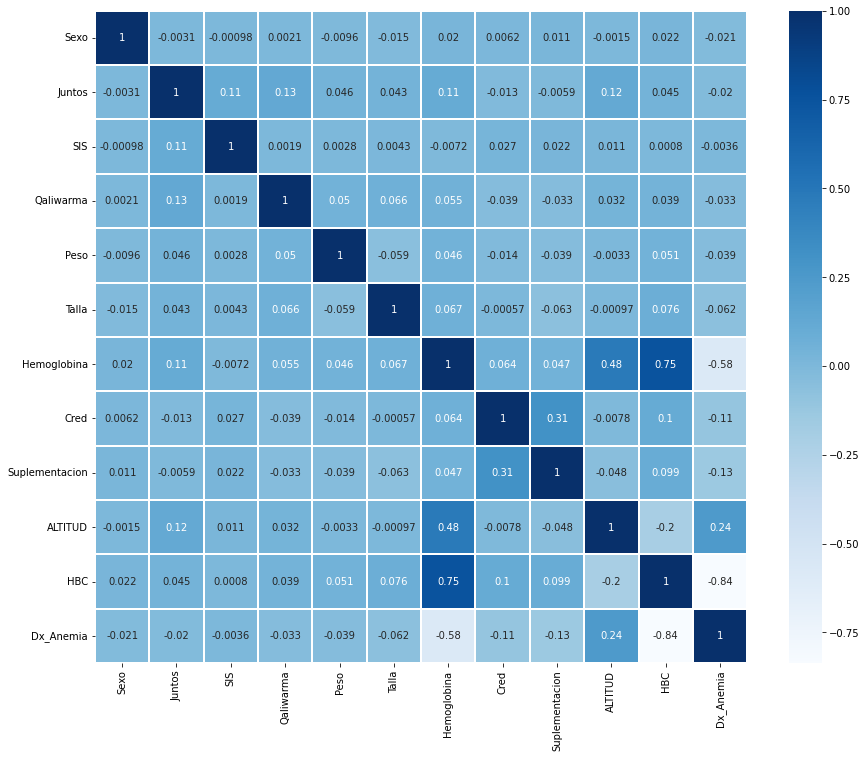

In [50]:
matrix = df.copy()
plt.figure(figsize=(15, 12))
corr = matrix.corr()
sns.heatmap(corr, linewidths=0.1,vmax=1.0, square=True, cmap="Blues", linecolor='white', annot=True)
matrix.head()

### Eliminación de variables no relevantes

In [254]:
df = df.drop(['Sexo', 'Juntos', 'SIS', 'Qaliwarma', 'Peso', 'Talla', 'Cred', 'Suplementacion'], axis=1)
df.head()

,Hemoglobina,ALTITUD,HBC,Dx_Anemia
0,12.2,1950,11.494917,0
1,11.7,2000,10.952880,1
2,13.2,2000,12.452880,0
3,13.0,3450,10.512719,1
4,11.9,3450,9.412719,2


# Training and Testing

In [255]:
import numpy as np
from sklearn.model_selection import train_test_split

y = df[['Dx_Anemia']]
X = df.drop('Dx_Anemia', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [256]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(fit_intercept=True)
# # Fit the model
linear_model.fit(X_train, y_train)
line_y_linear = linear_model.predict(X_test)

In [257]:
linear_test_pred = linear_model.predict(X_test)
linear_train_pred = linear_model.predict(X_train)

In [263]:
# sns.regplot(x=y_test, y=line_y_linear, ci=None, color="y", scatter=True)

### Silhouette Method

In [259]:
# silhouette score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

best_k = 0
for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X_train)
    labels = kmeans.predict(X_test)
    silhouette_avg = silhouette_score(X_test, labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    if silhouette_avg > best_k:
        best_k = silhouette_avg
        best_n_clusters = n_clusters

print("The best number of clusters is:", best_n_clusters)



For n_clusters = 2 The average silhouette_score is : 0.786980525873925
For n_clusters = 3 The average silhouette_score is : 0.722745013789127
For n_clusters = 4 The average silhouette_score is : 0.6789933784941445
For n_clusters = 5 The average silhouette_score is : 0.6483004708636761
For n_clusters = 6 The average silhouette_score is : 0.6128972020812429
For n_clusters = 7 The average silhouette_score is : 0.6419004874185641
For n_clusters = 8 The average silhouette_score is : 0.6500566966281538
For n_clusters = 9 The average silhouette_score is : 0.6526913597282286
The best number of clusters is: 2


In [261]:
kmeans = KMeans(n_clusters=int(best_n_clusters), random_state=0).fit(X)
kmeans.predict(X)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
labels = pd.Series(kmeans.labels_, name="class")
X.join(labels)

[1 1 1 ... 0 1 0]
[[  11.53153041  399.07001352   11.49602887]
 [  12.7499022  2833.41850119   11.07508721]]


,Hemoglobina,ALTITUD,HBC,class
0,12.20,1950,11.494917,1
1,11.70,2000,10.952880,1
2,13.20,2000,12.452880,1
3,13.00,3450,10.512719,1
4,11.90,3450,9.412719,1
...,...,...,...,...
51964,11.50,2765,9.960341,1
51965,9.90,39,9.903754,0
51966,12.21,1377,11.901137,0
51967,14.00,2538,12.724772,1


c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


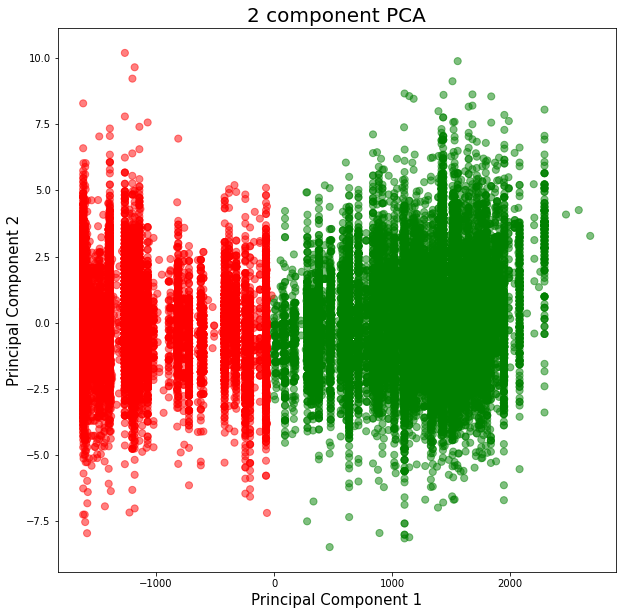

In [262]:
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=best_n_clusters).fit(X)
centroids = kmeans.cluster_centers_

# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

#transform n variiables to 2 principal components to plot
pca = PCA(n_components=2)
pca_fit = pca.fit(X)
principalComponents = pca_fit.transform(X)
principalDf = pd.DataFrame(data = principalComponents
         , columns = ['principal component 1', 'principal component 2'])

colors =['red','green','blue','yellow']
centroidColor= []
for item in range(best_n_clusters):
  centroidColor.append(colors[item])

dataPointColor=[]
for row in labels:
  dataPointColor.append(colors[row])

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], 
c=dataPointColor, s=50, alpha=0.5)

C_transformed = pca_fit.transform(C)
plt.scatter(C_transformed[:, 0], C_transformed[:, 1], c=centroidColor, s=200, marker=('x'))
plt.show()

# Variable Analysis

## Qaliwarma affects anemia cases?

C:\Users\jackc\AppData\Local\Temp\ipykernel_14140\2442303897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  QW_data.loc['Dx_Anemia'] = QW_data['Dx_Anemia'].map({0: 0, 1:0, 2:1, 3:1})


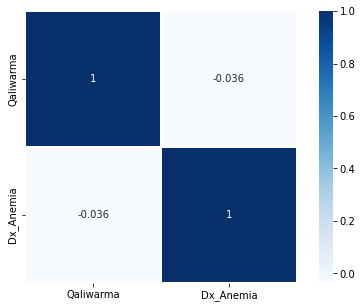

In [68]:
QW_data = df[['Qaliwarma', 'Dx_Anemia']]
QW_data.loc['Dx_Anemia'] = QW_data['Dx_Anemia'].map({0: 0, 1:0, 2:1, 3:1})


plt.figure(figsize=(8, 5))
corr = QW_data.corr()
sns.heatmap(corr, linewidths=0.1,vmax=1.0, square=True, cmap="Blues", linecolor='white', annot=True)
plt.show() 

## CRED affects anemia cases?

C:\Users\jackc\AppData\Local\Temp\ipykernel_14140\3081099521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cred_data.loc['Dx_Anemia'] = Cred_data['Dx_Anemia'].map({0: 0, 1:0, 2:1, 3:1})


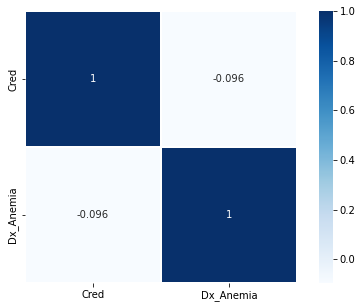

In [70]:
Cred_data = df[['Cred', 'Dx_Anemia']]
Cred_data.loc['Dx_Anemia'] = Cred_data['Dx_Anemia'].map({0: 0, 1:0, 2:1, 3:1})


plt.figure(figsize=(8, 5))
corr = Cred_data.corr()
sns.heatmap(corr, linewidths=0.1,vmax=1.0, square=True, cmap="Blues", linecolor='white', annot=True)
plt.show() 

## Juntos affects anemia cases?  

C:\Users\jackc\AppData\Local\Temp\ipykernel_14140\3147606408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Juntos_data.loc['Dx_Anemia'] = Juntos_data['Dx_Anemia'].map({0: 0, 1:0, 2:1, 3:1})


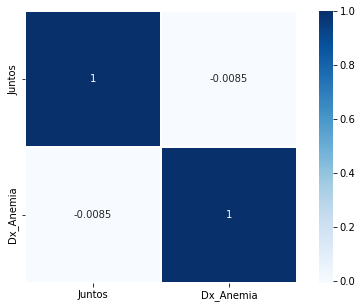

In [71]:
Juntos_data = df[['Juntos', 'Dx_Anemia']]
Juntos_data.loc['Dx_Anemia'] = Juntos_data['Dx_Anemia'].map({0: 0, 1:0, 2:1, 3:1})


plt.figure(figsize=(8, 5))
corr = Juntos_data.corr()
sns.heatmap(corr, linewidths=0.1,vmax=1.0, square=True, cmap="Blues", linecolor='white', annot=True)
plt.show() 